<a href="https://colab.research.google.com/github/mehraj-alom/pytorch/blob/main/02nn_classificationWithPytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
!nvidia-smi

Tue Aug 26 21:29:37 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   45C    P0             28W /   70W |     160MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

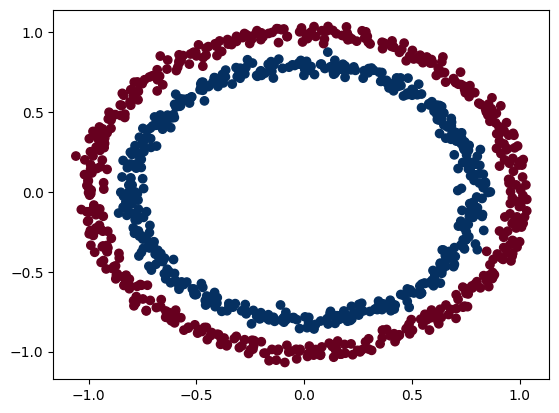

In [23]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
n_samples = 1000

X , y = make_circles(n_samples,
                     noise = 0.03,
                     random_state = 42
                     )
plt.scatter(X[:,0],X[:,1],c = y ,cmap=plt.cm.RdBu)


In [24]:
import torch
from sklearn.model_selection import train_test_split
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.2)
X_train[:5],y_train[:5]


(tensor([[-1.0017,  0.0693],
         [-0.1272,  1.0223],
         [-0.5141,  0.8718],
         [-0.0895, -1.0678],
         [-0.8960,  0.4505]]),
 tensor([0., 0., 0., 0., 0.]))

In [25]:
from torch import nn
import torch # Import torch

class Circle_Non_lin(nn.Module):
  def __init__(self):
    super().__init__()

    self.l1 = nn.Linear(in_features=2,out_features=10)
    self.l2 = nn.Linear(in_features=10,out_features=20)
    self.l3 = nn.Linear(in_features=20,out_features=1)
    self.relu = nn.ReLU()

  def forward(self,X):
    return self.l3(self.relu(self.l2(self.relu(self.l1(X)))))

# Make code device agnostic
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")


model = Circle_Non_lin().to(device)
model

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(),
                            lr = 0.1)

torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


for epoch in range(epochs):
  model.train()

  y_logits = model(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> pred probs -> y labels

  loss = loss_fn(y_logits,y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()


  if epoch % 100 == 0:
      model.eval()
      with torch.no_grad():
          test_logits = model(X_test).squeeze()
          test_pred = torch.round(torch.sigmoid(test_logits))
          test_loss = loss_fn(test_logits, y_test)
          test_acc = (test_pred == y_test).sum().item()/len(y_test)
          print(f"Epoch: {epoch} | Train Loss: {loss:.5f} | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}")

Using device: cuda
Epoch: 0 | Train Loss: 0.69232 | Test Loss: 0.69373 | Test Acc: 0.56
Epoch: 100 | Train Loss: 0.69008 | Test Loss: 0.69128 | Test Acc: 0.56
Epoch: 200 | Train Loss: 0.68789 | Test Loss: 0.68914 | Test Acc: 0.53
Epoch: 300 | Train Loss: 0.68538 | Test Loss: 0.68663 | Test Acc: 0.53
Epoch: 400 | Train Loss: 0.68214 | Test Loss: 0.68347 | Test Acc: 0.53
Epoch: 500 | Train Loss: 0.67784 | Test Loss: 0.67937 | Test Acc: 0.53
Epoch: 600 | Train Loss: 0.67246 | Test Loss: 0.67397 | Test Acc: 0.56
Epoch: 700 | Train Loss: 0.66480 | Test Loss: 0.66647 | Test Acc: 0.57
Epoch: 800 | Train Loss: 0.65323 | Test Loss: 0.65552 | Test Acc: 0.60
Epoch: 900 | Train Loss: 0.63562 | Test Loss: 0.63873 | Test Acc: 0.73


In [26]:
model.eval()
with torch.no_grad():
    y_pred_logits = model(X_test)
    y_pred_classes = torch.round(torch.sigmoid(y_pred_logits)).squeeze()

print(y_pred_classes[:10])

tensor([1., 0., 1., 1., 1., 0., 0., 0., 1., 0.], device='cuda:0')


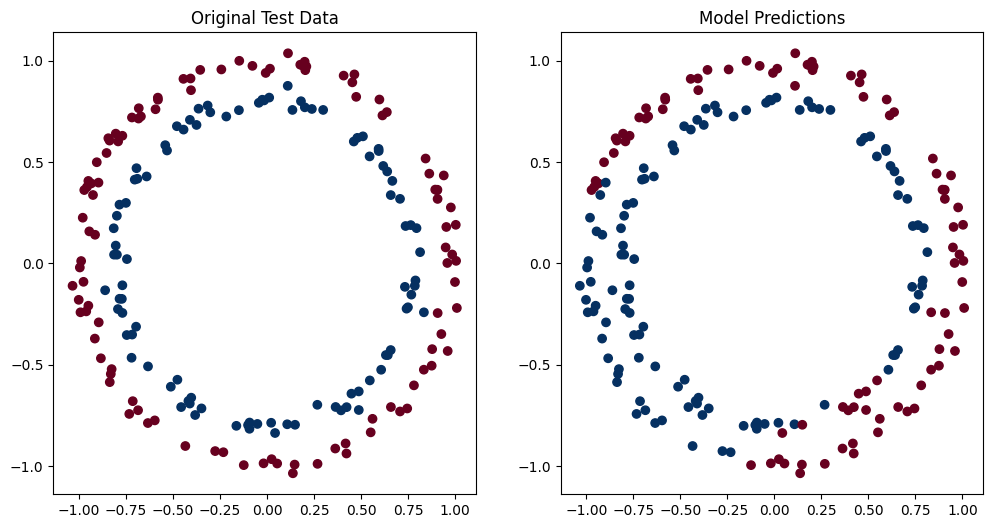

In [27]:
import matplotlib.pyplot as plt

# Move data back to CPU if it's on GPU
X_test_cpu = X_test.cpu().numpy()
y_test_cpu = y_test.cpu().numpy()
y_pred_classes_cpu = y_pred_classes.cpu().numpy()

plt.figure(figsize=(12, 6))

# Plot original test data
plt.subplot(1, 2, 1)
plt.scatter(X_test_cpu[:, 0], X_test_cpu[:, 1], c=y_test_cpu, cmap=plt.cm.RdBu)
plt.title("Original Test Data")

# Plot model predictions
plt.subplot(1, 2, 2)
plt.scatter(X_test_cpu[:, 0], X_test_cpu[:, 1], c=y_pred_classes_cpu, cmap=plt.cm.RdBu)
plt.title("Model Predictions")

plt.show()

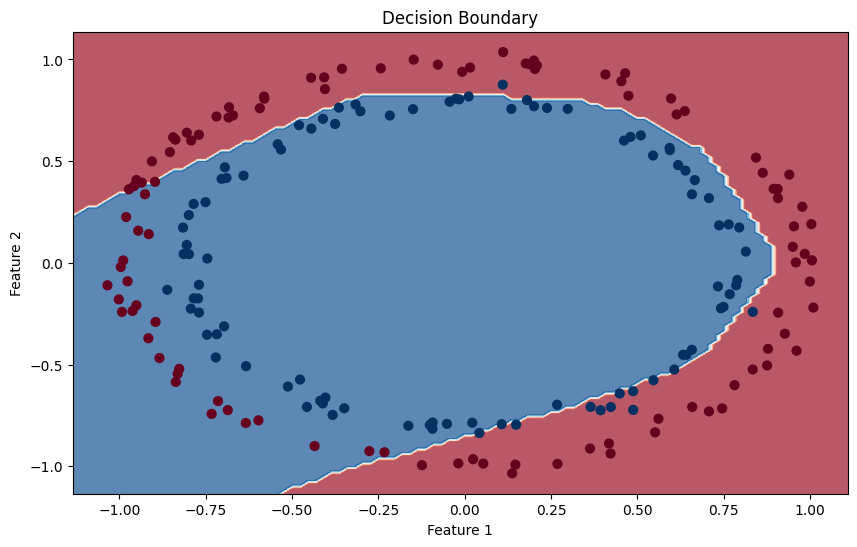

In [28]:
# Create a meshgrid of points
x_min, x_max = X_test_cpu[:, 0].min() - 0.1, X_test_cpu[:, 0].max() + 0.1
y_min, y_max = X_test_cpu[:, 1].min() - 0.1, X_test_cpu[:, 1].max() + 0.1
xx, yy = torch.meshgrid(torch.linspace(x_min, x_max, 100),
                        torch.linspace(y_min, y_max, 100),
                        indexing='ij') # 'ij' indexing is more intuitive

grid = torch.stack([xx.ravel(), yy.ravel()], dim=1)

model.eval()
with torch.no_grad():
    y_logits_grid = model(grid.to(device)).squeeze()
    y_pred_probs_grid = torch.sigmoid(y_logits_grid)
    y_pred_classes_grid = torch.round(y_pred_probs_grid)

# Reshape the predictions back to the original meshgrid shape
y_pred_classes_grid_reshaped = y_pred_classes_grid.reshape(xx.shape).cpu()


# Plot the decision boundary and the original data
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, y_pred_classes_grid_reshaped, cmap=plt.cm.RdBu, alpha=0.7)
plt.scatter(X_test_cpu[:, 0], X_test_cpu[:, 1], c=y_test_cpu, s=40, cmap=plt.cm.RdBu)
plt.title("Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [ ]:
#time 12:45